<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Katty/blob/main/Actividad_Semanal_4(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre : Katherine Vanegas Salamanca

Matricula : A01794113

Materia: Ciencia de Datos

Profesor: Jobish Vallikavungal Devassia / Roberto Antonio Guevara González

Actividad: Actividad Semanal -- 4 (PCA)

## PARTE 1

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [127]:
#llamamos el archivo y asi visualizar los datos como df
default_payments = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df1 = default_payments.copy()
df1


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [128]:
df1.shape # con este codigo conozco las dimensiones del df

(30000, 25)

In [129]:
df1.columns # asi como los encabezados de cada columna los cuales se pueden comparar con el archivo descriptivo de las variables


Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [130]:
df1.fillna(value = 0, inplace = True) # yaju7i que hay datos faltantes se reemplazan por 0, en la actividad anterior se hizo el analisis respectivo

In [131]:
#la idea es conocer los promedios de cada columna 
print(df1.mean().round(2))

ID      15000.50
X1     167484.32
X2          1.60
X3          1.85
X4          1.55
X5         35.48
X6         -0.02
X7         -0.13
X8         -0.17
X9         -0.22
X10        -0.27
X11        -0.29
X12     51218.08
X13     49172.70
X14     47004.97
X15     43254.01
X16     40301.64
X17     38868.18
X18      5661.44
X19      5920.71
X20      5224.23
X21      4825.48
X22      4798.54
X23      5215.39
Y           0.22
dtype: float64


In [155]:
# de la columna X2 a X4 son de tipo demográfico (edad, estado civil y escolaridad)
grupo1 = df1[['X2','X3','X4']]
grupo1.corr()


,X2,X3,X4
X2,1.000000,0.014700,-0.031016
X3,0.014700,1.000000,-0.142844
X4,-0.031016,-0.142844,1.000000


In [156]:
Vargrupo1 = np.cov([df1.X2, df1.X3, df1.X4])
Vargrupo1
grupo1v = df1[['X2','X3','X4']]
t1= grupo1v.var().sum()
t1

1.1367056890785248

In [157]:
varX2 = Vargrupo1[0][0]
varX3 = Vargrupo1[1][1]
varX4 = Vargrupo1[2][2]


In [158]:
print('Total Varience \t:', t1.round(2) )
print('Varience prop. of X2 \t:', ((varX2/t1)*100).round(2),'%' )
print('Varience prop. of X3 \t:', ((varX3/t1)*100).round(2),'%' )
print('Varience prop. of X4 \t:', ((varX4/t1)*100).round(2),'%' )


Total Varience 	: 1.14
Varience prop. of X2 	: 21.05 %
Varience prop. of X3 	: 54.97 %
Varience prop. of X4 	: 23.98 %


In [159]:
grupo1.corr().round(2)

,X2,X3,X4
X2,1.00,0.01,-0.03
X3,0.01,1.00,-0.14
X4,-0.03,-0.14,1.00


El comportamiento de x2 y x4 es mayoritariamente explicado por x3

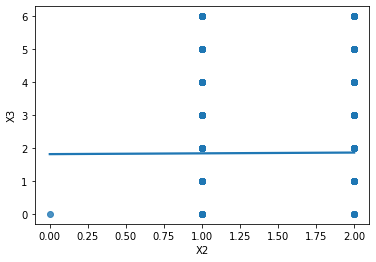

In [160]:
p1 = sns.regplot(data = df1,  
                x = df1.X2, 
                y = df1.X3
                ) 
p1

In [161]:
pcs = PCA(n_components=3)

pcs.fit(df1[['X2', 'X3', 'X4']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.796566,0.558207,0.558207
1,0.514632,0.232994,0.791201
2,0.487178,0.208799,1.000000


In [162]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)
pcsSummary.columns = ['PC1', 'PC2','PC3']
pcsSummary

,PC1,PC2,PC3
Standard deviation,0.796566,0.514632,0.487178
Proportion of variance,0.558207,0.232994,0.208799
Cumulative proportion,0.558207,0.791201,1.000000


In [137]:
grupo2 = df1[['X6','X7','X8','X9', 'X10','X11']]
grupo2.corr()

,X6,X7,X8,X9,X10,X11
X6,1.000000,0.672132,0.574452,0.538835,0.509271,0.474496
X7,0.672132,1.000000,0.766738,0.662086,0.622716,0.575357
X8,0.574452,0.766738,1.000000,0.776619,0.685996,0.632012
X9,0.538835,0.662086,0.776619,1.000000,0.819933,0.716587
X10,0.509271,0.622716,0.685996,0.819933,1.000000,0.816816
X11,0.474496,0.575357,0.632012,0.716587,0.816816,1.000000


In [163]:
grupo3 = df1[['X1','X6','X11']]
grupo3.corr()

,X1,X6,X11
X1,1.000000,-0.271257,-0.235137
X6,-0.271257,1.000000,0.474496
X11,-0.235137,0.474496,1.000000


##PARTE 2

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?